# Introduction

> skin tumours are a challenging group of conditions that can be categorised into those that are commonly seen and easily recognised based on the characteristic site of presentation, size, colour, distribution and symptoms.Skin tumours are classified on 10 IMG_CLASSES.
> * 1. Eczema 1677
> * 2. Melanoma 15.75k
> * 3. Atopic Dermatitis - 1.25k
> * 4. Basal Cell Carcinoma (BCC) 3323
> * 5. Melanocytic Nevi (NV) - 7970
> * 6. Benign Keratosis-like Lesions (BKL) 2624
> * 7. Psoriasis pictures Lichen Planus and related diseases - 2k
> * 8. Seborrheic Keratoses and other Benign Tumors - 1.8k
> * 9. Tinea Ringworm Candidiasis and other Fungal Infections - 1.7k
> * 10. Warts Molluscum and other Viral Infections - 2103


# Table of Contents

> * Data Processing 
> *  Modeling :
    * TensorFlow
    * EfficientNetB7
    * Data augmentation
> * Save Model

# Data processing 

![](https://www.dataentryexport.com/blog/wp-content/uploads/2016/11/Change-your-business-with-organized-Data-Processing-Services.jpg)

In [1]:
!pip install split_folders

In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mping
import random
import splitfolders
import os

In [3]:
os.makedirs('output')
os.makedirs('output/train')
os.makedirs('output/val')
os.makedirs('output/test')

loc = "/kaggle/input/skin-diseases-image-dataset/IMG_CLASSES"

splitfolders.ratio(loc,output ="output",ratio = (0.80,.1,.1))

Copying files: 27153 files [03:57, 114.35 files/s]


In [4]:
def random_image(val_dir,val_class):
    folder = val_dir +val_class
    random_image = random.sample(os.listdir(folder),1)
    img = mping.imread(folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(val_class)
    return img

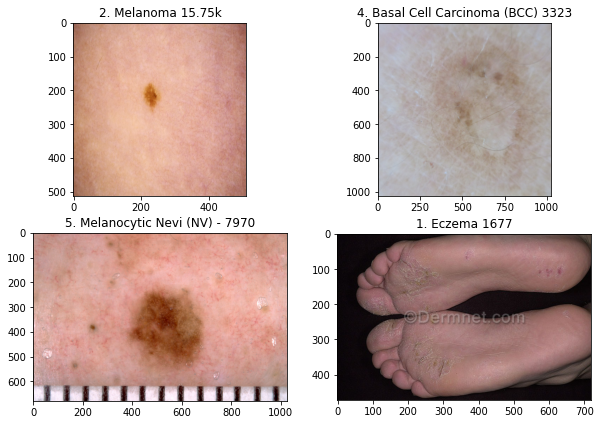

In [5]:
fig = plt.figure(figsize=(10, 7))
#Add an Axes to the figure as part of a subplot arrangement(Three integers (nrows, ncols, index).)
fig.add_subplot(2,2,1)
img_1 = random_image(val_dir = "./output/val/",val_class = "2. Melanoma 15.75k")
fig.add_subplot(2,2,2)
img_2 = random_image(val_dir = "./output/val/",val_class = "4. Basal Cell Carcinoma (BCC) 3323")
fig.add_subplot(2,2,3)
img_3 = random_image(val_dir = "./output/val/",val_class = "5. Melanocytic Nevi (NV) - 7970")
fig.add_subplot(2,2,4)
img4 = random_image(val_dir = "./output/val/",val_class = "1. Eczema 1677")


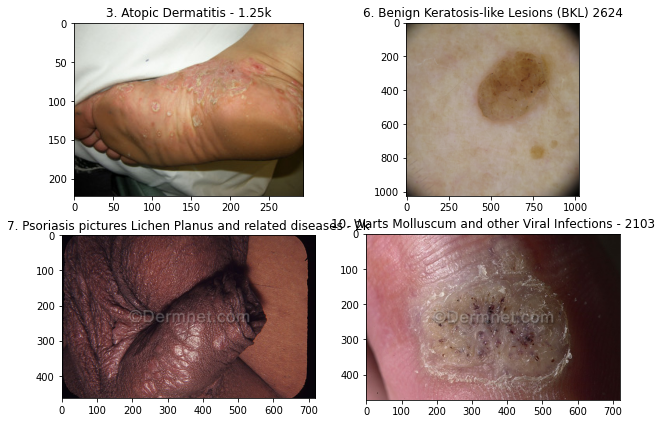

In [6]:
fig = plt.figure(figsize=(10, 7))
#Add an Axes to the figure as part of a subplot arrangement(Three integers (nrows, ncols, index).)
fig.add_subplot(2,2,1)
img_1 = random_image(val_dir = "./output/val/",val_class = "3. Atopic Dermatitis - 1.25k")
fig.add_subplot(2,2,2)
img_2 = random_image(val_dir = "./output/val/",val_class = "6. Benign Keratosis-like Lesions (BKL) 2624")
fig.add_subplot(2,2,3)
img_3 = random_image(val_dir = "./output/val/",val_class = "7. Psoriasis pictures Lichen Planus and related diseases - 2k")
fig.add_subplot(2,2,4)
img4 = random_image(val_dir = "./output/val/",val_class = "10. Warts Molluscum and other Viral Infections - 2103")

# Modeling 

![](https://pyimagesearch.com/wp-content/uploads/2019/10/keras_vs_tfdotkeras_header.png)

In [7]:
import tensorflow as tf
from tensorflow.keras import layers


In [8]:
from tensorflow.keras.preprocessing import image_dataset_from_directory

train_dir = "./output/train"
test_dir =  "./output/test"
val_dir = "./output/val"

train_data = image_dataset_from_directory(train_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = True,seed = 42)
test_data = image_dataset_from_directory(test_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = False,seed = 42)
val_data = image_dataset_from_directory(val_dir,label_mode = "categorical",
                                          image_size = (224,224),batch_size = 32,
                                         shuffle = False,seed = 42)

Found 21719 files belonging to 10 classes.


2022-12-27 20:07:35.206446: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 20:07:35.303392: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 20:07:35.304267: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-12-27 20:07:35.309108: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 2723 files belonging to 10 classes.
Found 2711 files belonging to 10 classes.


# EarlyStopping
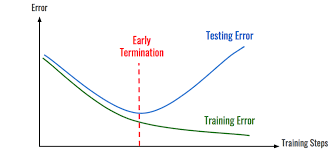

# ReduceLROnPlateau
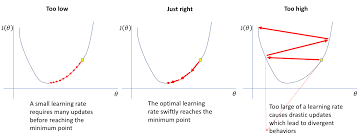

In [9]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = "val_loss",patience = 6,
                                             min_delta = 0.0001)

reduce_lr = tf.keras.callbacks.ReduceLROnPlateau(monitor = "val_loss",factor = 0.2,
                                                patience = 4,min_lr = 1e-7)


# EfficientNetB7

> EfficientNet is a convolutional neural network architecture and scaling method that uniformly scales all dimensions of depth/width/resolution using a compound coefficient. Unlike conventional practice that arbitrary scales these factors, the EfficientNet scaling method uniformly scales network width, depth, and resolution with a set of fixed scaling coefficients

![](https://www.researchgate.net/publication/358902226/figure/fig6/AS:1132398989328389@1646996366464/EfficientNetB7-architecture.ppm)



In [10]:
model = tf.keras.applications.EfficientNetB7(include_top = False)
model.trainable = False
#To "freeze" a layer means to exclude it from training, i.e. its weights will never be updated.

258088960/258076736 [==============================] - 1s 0us/step


# Data augmentation 

> Data augmentation is used here to prevent overfitting, we can experiment without data augmentation and check whether the model overfits or not,but since we are using a transfer learning Architecture such as EfficientNet,its best to include data augmentation since the probability of our model overfitting is very high.
> 
> TensorFlow provides us with two methods we can use to apply data augmentation to our tf.data pipelines:
> 
> Use the Sequential class and the preprocessing module to build a series of data augmentation operations, similar to Keras’ ImageDataGenerator class
> Apply tf.image functions to manually create the data augmentation routine
You can also use Keras preprocessing layers for data augmentation, such as tf.keras.layers.RandomFlip and tf.keras.layers.RandomRotation .

![](https://www.baeldung.com/wp-content/uploads/sites/4/2022/08/AugmentData.png)

In [11]:
from tensorflow.keras.layers.experimental import preprocessing

data_aug = tf.keras.Sequential([
    preprocessing.RandomWidth(0.2),
    preprocessing.RandomHeight(0.2),
    preprocessing.RandomRotation(0.2),
    preprocessing.RandomFlip("horizontal")
],name = "data_augmentation_layer")

In [12]:
inputs = layers.Input(shape = (224,224,3),name = "input_layer")
x = data_aug(inputs)
x = model(x)
x = layers.GlobalAvgPool2D(name = "pooling_layer")(x)
# parameter used to specify the size of the output generated from the layer.
x = layers.Dense(32,activation = "relu",kernel_initializer = tf.keras.initializers.he_normal())(x)
x = layers.Dense(10)(x)
outputs = layers.Activation("softmax",dtype = tf.float32)(x)
model = tf.keras.Model(inputs,outputs)
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_layer (InputLayer)     [(None, 224, 224, 3)]     0         
_________________________________________________________________
data_augmentation_layer (Seq (None, None, None, 3)     0         
_________________________________________________________________
efficientnetb7 (Functional)  (None, None, None, 2560)  64097687  
_________________________________________________________________
pooling_layer (GlobalAverage (None, 2560)              0         
_________________________________________________________________
dense (Dense)                (None, 32)                81952     
_________________________________________________________________
dense_1 (Dense)              (None, 10)                330       
_________________________________________________________________
activation (Activation)      (None, 10)                0     

Once the model is created, you can config the model with 
* losses and metrics with model.compile(), 
* train the model with model.fit(),
* or use the model to do prediction with model.predict().

In [13]:
model.compile(loss = tf.keras.losses.CategoricalCrossentropy(),optimizer = tf.keras.optimizers.Adam(),metrics = ["accuracy"])

In [14]:
history_1 = model.fit(train_data,epochs =20 , validation_data = val_data, 
                      callbacks = [early_stop,reduce_lr])

Epoch 1/20


2022-12-27 20:08:05.275111: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-12-27 20:08:10.063261: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


679/679 [==============================] - 284s 381ms/step - loss: 1.1042 - accuracy: 0.5831 - val_loss: 0.9619 - val_accuracy: 0.6363
Epoch 2/20
679/679 [==============================] - 223s 327ms/step - loss: 0.9447 - accuracy: 0.6398 - val_loss: 0.8884 - val_accuracy: 0.6658
Epoch 3/20
679/679 [==============================] - 211s 309ms/step - loss: 0.8957 - accuracy: 0.6613 - val_loss: 0.8613 - val_accuracy: 0.6754
Epoch 4/20
679/679 [==============================] - 201s 294ms/step - loss: 0.8605 - accuracy: 0.6758 - val_loss: 0.8487 - val_accuracy: 0.6809
Epoch 5/20
679/679 [==============================] - 199s 292ms/step - loss: 0.8419 - accuracy: 0.6821 - val_loss: 0.8501 - val_accuracy: 0.6754
Epoch 6/20
679/679 [==============================] - 192s 282ms/step - loss: 0.8148 - accuracy: 0.6932 - val_loss: 0.8481 - val_accuracy: 0.6813
Epoch 7/20
679/679 [==============================] - 190s 279ms/step - loss: 0.7966 - accuracy: 0.6969 - val_loss: 0.8075 - val_accura

In [15]:
print("Testing Accuracy",model.evaluate(test_data)) 

86/86 [==============================] - 23s 262ms/step - loss: 0.7402 - accuracy: 0.7345
Testing Accuracy [0.7402066588401794, 0.7344840168952942]


# Save Model

In [16]:
model.save('my_model.h5')

/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)
